In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

# Random Assignment

In controlled experiments, we want to assign the participating individuals to one of two (or more) groups. In a drug trial, volunteers for the trial would either receive the new treatment or a placebo (a fake treatment). In an A/B test of a new feature on a Web site, visitors to the site would either see the new feature or the usual Web page.  In both examples, we control the assignment to groups, and in a *randomized* controlled experiment, we use a chance process to make the assignment.  

In drug trials, the scientists often use a simple random sample to select the units for the treatment, and those not selected receive the placebo. With A/B testing, we often use systematic sampling, where, for example, every other visitor to the page is shown the new feature (see the exercises to learn more about systematic sampling). 



We explore the SRS approach to random assignment with a small group of just $6$ individuals, labeled  $A - F.$ We enumerate all the possible treatment  groups that can be formed by a SRS of size $3$ from this population:

$$ABC ~~ ABD ~~ ABE ~~ ABF \\ ACD ~~ACE ~~ ACF ~~ ADE \\ ADF ~~ AEF ~~ BCD ~~ BCE \\ BCF ~~ BDE ~~ BDF ~~ BEF \\ CDE ~~ CDF ~~ CEF ~~ DEF $$

Each sample represents a possible treatment group, and its complement the control group, e.g., the first sample has $ABC$ in the treatment group, and $DEF$  in the control group. As we saw in Section {numref}`sec:samplingVariation`, we can use the chance mechanism to work with probabilities of particular subsets and apply these to the outcome of an experiment. The next section provides an example.


## Example: Efficacy of COVID-19 Vaccines

Detroit Mayor Mike Duggan made national news in March 2021 when he turned down a shipment of over 6,000 Johnson & Johnson vaccine doses stating that the citiziens of his city should "get the best". The mayor was refering to the efficacy rate of the vaccine, which was reported to be about 66%. In comparison, Moderna and Pfizer both reported efficacy rates of about 95% for their vaccines. 

Duggan's reasoning seems valid, but the scope of the three clinical trials are not comparable, meaning direct comparisons of the experiments is problematic {cite}`irfan2020`. Moreover, the Centers for Disease Control (CDC) considers a 66% efficicay rate quite good, which is why it was given emergency approval {cite}`cdc2021`.

We consider each of these points in turn, beginning with scope and then efficacy.


### Scope

Recall that when we evaluate the scope of the data, we consider who, when, and where the study took place. For the Johnson & Johnson clinical trial, participants: 

+ included adults 18 and over, where roughly 40% had conditions, called comorbidities, associated with an increased risk for getting severe COVID-19;
+ enrolled in the study from October to November, 2020;
+ were from 8 countries across 3 continents, including the US and South Africa.

The participants in the Moderna and Pfizer trials were primarily from the US, roughly 40% had comorbidities for severe COVID-19, and the trial took place earlier, over summer 2021. 
The timing and location of the trials make them difficult to compare.
Cases of COVID-19 were at a low point in the summer in the US, but they shot up in the late fall.
Also, a variant of the virus that is more contagious was spreading rapidly in South Africa at the time of the J&J trial. 



Each clinical trial was designed to test a vaccine against no vaccine under similar circumstances. 
This is accomplished through random assignment of subjects to treatment and control groups. 
While the scope from one trial to the next are quite different, 
the randomization within a trial keeps the scope of the treatment and control groups roughly the same, which enables meaningful comparisons between groups in the same trial. 

The scope was different enough across the three vaccine trials to make direct comparisons problematic. 
Next, we consider what the vaccine's efficacy rate means.


### Design

Johnson & Johnson enrolled 43,738 people in their trial {cite}`janssen2021`.
These participants were split into two groups at random.
Half received the new vaccine, and the other half received a placebo, such as a saline solution.
Then, everyone was followed for 28 days to see whether they contracted COVID-19.

A lot of information was recorded on each patient, such as their age, race, and sex, and in addition,
whether they caught COVID, including the severity of the disease. At the end of 28 days, they found 468 cases of COVID-19, 117 of these were in the treatment group, and 351 in the control group.




The random assignment to treatment and control, gives the scientists a framework to assess the effectiveness of the vaccine. 
The typical reasoning goes as follows:

+ Begin with the assumption that the vaccine is ineffective
+ so the 468 who caught COVID-19 would have caught it whether or not they received the vaccine
+ and, the remaining 43,270 people in the trial who did not get sick would have remained healthy whether or not they received the vaccine.
+ The split of 117 sick people in treatment and 351 in control was just do to the chance process in assigning participants to treatment or control.

We can set up an urn model to reflect this scenario.


### The Urn Model

Our urn has 43,738 marbles, one for each person in the clinical trial.
Since there were 468 cases among them,
we label 468 marbles with a 1 and the remaining 43,270 with 0. 
We draw half the marbles (21,869) from the urn to receive the treatment, and
the half remaining in the urn receive the placebo. 

The results of the experiment are simply the count of the number of marbles marked 1 that were randomly drawn from the urn. 

We can simulate this process to get a sense of how likely it would be under these assumptios to draw only 117 marbles marked 1 from the urn. Since we draw half of the marbles from the urn, we would expect about half of the 468, or 234, to be drawn. The simulation study gives us a sense of the variation that might result from the random assignment process. That is, we can approximate the chance that there would be 117 or fewer cases of the virus in the treatment group. This calculation is based on the above assumptions, namely that the vaccine has no impact.



### Simulation study

We saw earlier that we can generate random outcomes according to the hypergeometric probability distribution, rather than having to program the urn sampling from scratch.   


In [2]:
simulations_fast = np.random.hypergeometric(ngood=468, nbad=43270, nsample=21869, size=500000)

In [3]:
np.mean(simulations_fast)

234.010756

Text(0.5, 0, 'Count of Cases in the Treatment Group')

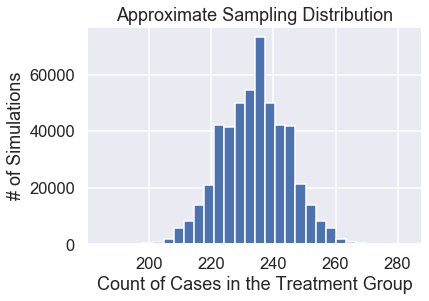

In [4]:

plt.hist(simulations_fast, bins=30)
#plt.axvline(0.57, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Count of Cases in the Treatment Group')

In our simulation, we repeated the process of random assignment to the treatment group 500,000 times.
Indeed, we found that on average there were 234 cases of disease in the treatment group.
The histogram of outcomes shows that not one of the 500,000 simulations had as few as 117 cases or fewer.
It would be an extremely rare event to see so few cases of COVID-19, if in fact the vaccine was not effective. 

In [5]:
np.std(simulations_fast)

10.761876430644612

### Vaccine Efficacy

Vaccine Efficacy (VE) is measured by comparing the risk of disease among vaccinated and unvaccinated persons: 

$$ \frac{\textrm{Risk among unvaccinated group} − \textrm{Risk among vaccinated group}}
 {\textrm{Risk among unvaccinated group}},$$ 
 
where, e.g., the risk among unvaccinated is the proportion of unvaccinated who contracted COVID. 

Since the two groups had the same number in each, we can compute the efficacy as:

In [6]:
(351 - 117) / 351

0.6666666666666666

The Centers for Disease Control sets a standard for VE of 50% when deciding whether to adopt a new vaccine. This would be equivalent to how many cases in the treatment group?

In [7]:
468/3

156.0

We can see from the histogram that none of the simulations yielded as few or fewer than 156 cases in the treatment group. Furthermore, when it came to preventing severe cases of Covid, the J&J vaccine was over 80% effective, and no deaths were observed in the treatment group. 

The Johnson & Johnson vaccine received emergency approval in spring 2021, and expects to receive full approval by the FDA in fall 2021. 
The Mayor of Detroit retracted his original statement, saying 
“I have full confidence that the Johnson & Johnson vaccine is both safe and effective.” 